## Imports 

In [ ]:
import sys
import os
if os.getcwd().endswith('notebooks'):
    os.chdir("..")
print(os.getcwd())

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Import the Data 

In [7]:
df = pd.read_csv(os.path.join('data', 'gaming_cheaters.csv'))
df.head()

,win_ratio,total_accuracy,kill_to_death_ratio,total_wins_per_hour,mvp_per_round,total_headshots_per_round,accuracy_ssg08,accuracy_awp,accuracy_deagle,accuracy_aug,...,accuracy_nova,accuracy_p250,accuracy_p90,accuracy_sawedoff,accuracy_sg556,accuracy_tec9,accuracy_ump45,accuracy_xm1014,total_games_owned,VACBanned
0,0.57,0.20,1.68,17.19,0.15,0.95,0.32,0.40,0.27,0.23,...,0.22,0.22,0.20,0.19,0.21,0.21,0.20,0.22,79,0
1,0.46,0.13,0.65,17.55,0.05,0.26,0.22,0.28,0.13,0.14,...,0.24,0.12,0.15,0.08,0.11,0.19,0.19,0.09,12,1
2,0.51,0.15,0.46,22.48,0.09,0.54,0.20,0.25,0.21,0.27,...,0.22,0.23,0.17,0.20,0.20,0.18,0.44,0.20,88,1
3,0.52,0.20,1.04,16.32,0.08,0.82,0.28,0.34,0.25,0.21,...,0.18,0.20,0.17,0.15,0.21,0.16,0.18,0.17,57,1
4,0.51,0.24,1.35,23.18,0.16,0.60,0.32,0.44,0.32,0.25,...,0.21,0.27,0.18,0.08,0.43,0.13,0.16,0.27,242,1


## View the features with the largest difference between Label==1 and Label==0 

In [8]:
grouped = df.groupby('VACBanned').mean()
diff_between_label_means = grouped.diff(axis=0).loc[1].abs().sort_values(ascending=False)
diff_between_label_means[:10].index

Index(['total_games_owned', 'total_wins_per_hour', 'total_headshots_per_round',
       'kill_to_death_ratio', 'mvp_per_round', 'win_ratio', 'accuracy_tec9',
       'accuracy_xm1014', 'accuracy_m249', 'accuracy_m4a1'],
      dtype='object')

## Keep only the columns with a big difference between the means of label==0 and label==1 

In [9]:
df = df[['total_games_owned', 'total_wins_per_hour', 'total_headshots_per_round',
       'kill_to_death_ratio', 'mvp_per_round', 'win_ratio', 'accuracy_tec9',
       'accuracy_xm1014', 'accuracy_m249', 'accuracy_m4a1', 'VACBanned']]
df

,total_games_owned,total_wins_per_hour,total_headshots_per_round,kill_to_death_ratio,mvp_per_round,win_ratio,accuracy_tec9,accuracy_xm1014,accuracy_m249,accuracy_m4a1,VACBanned
0,79,17.19,0.95,1.68,0.15,0.57,0.21,0.22,0.15,0.19,0
1,12,17.55,0.26,0.65,0.05,0.46,0.19,0.09,0.13,0.10,1
2,88,22.48,0.54,0.46,0.09,0.51,0.18,0.20,0.19,0.13,1
3,57,16.32,0.82,1.04,0.08,0.52,0.16,0.17,0.16,0.21,1
4,242,23.18,0.60,1.35,0.16,0.51,0.13,0.27,0.15,0.23,1
...,...,...,...,...,...,...,...,...,...,...,...
977,38,23.80,0.48,1.07,0.11,0.49,0.13,0.15,0.06,0.16,1
978,65,24.47,0.36,0.79,0.11,0.52,0.19,0.15,0.09,0.21,1
979,24,22.63,0.37,0.96,0.09,0.48,0.17,0.18,0.17,0.20,0
980,33,24.74,0.24,0.81,0.07,0.48,0.13,0.12,0.06,0.19,0


## Split into Train and test sets 

In [10]:
X = df.loc[:, df.columns !='VACBanned'] #take all columns EXCEPT VACBanned Column
y = df.loc[:, df.columns =='VACBanned'] #take only the VACBanned column
X_train_pre_norm, X_test_pre_norm, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
print(X_train_pre_norm.shape, X_test_pre_norm.shape, y_train.shape, y_test.shape)

(736, 10) (246, 10) (736, 1) (246, 1)


### Normalize the data 

In [11]:
std_scale = preprocessing.StandardScaler().fit(X_train_pre_norm)
X_train_array = std_scale.transform(X_train_pre_norm) 
X_train = pd.DataFrame(X_train_array, index = X_train_pre_norm.index, columns = X_train_pre_norm.columns)
X_test_array = std_scale.transform(X_test_pre_norm)
X_test = pd.DataFrame(X_test_array, index = X_test_pre_norm.index, columns = X_train_pre_norm.columns)

## Create Deep Learning Models 

In [154]:
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=0)
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## View Accuracy of the Model 

In [156]:
# Evaluate the model and view its accuracy
loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print(f'Accuracy of this model is: {acc}')

Accuracy of this model is: 0.7113820910453796


## Make 1 Prediction 

In [157]:
# Make a prediction based on given input
# View the actual values (these ones are after normalization)
random_index = random.randint(0, len(X_test))
print(f'For Row: \n{X_test[random_index:random_index+1].transpose()}') 
actual_answer = y_test[random_index:random_index+1].values[0][0] # What is the actual answer for that row 

# What answer did the model predict for the selected row
yhat = model.predict(X_test[random_index:random_index+1]) 
print(f'For this row the model predicted: {yhat[0][0]}')
print(f'The actual answer was: {actual_answer}')

For Row: 
                                118
total_games_owned         -0.646800
total_wins_per_hour       -0.200784
total_headshots_per_round  0.253327
kill_to_death_ratio       -0.227785
mvp_per_round              0.035311
win_ratio                 -0.341683
accuracy_tec9             -0.083097
accuracy_xm1014           -1.194906
accuracy_m249             -0.041091
accuracy_m4a1             -0.392807
1/1 [==============================] - 0s 76ms/step
For this row the model predicted: 0.805443286895752
The actual answer was: 1


## View The accuracy and loss 

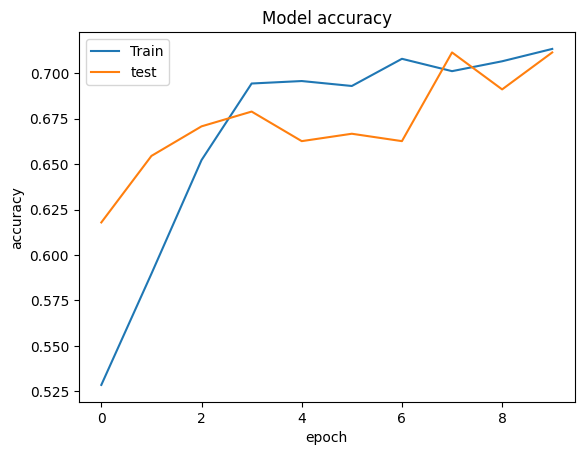

In [158]:
# plot the summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'test'], loc = 'upper left')
plt.show()
# If test set accuracy (orange) is much lower than the train accuracy (blue) it could mean that there is overfitting
# so decreasing number of epochs, batch size, number of layers in the model, number of neurons etc.

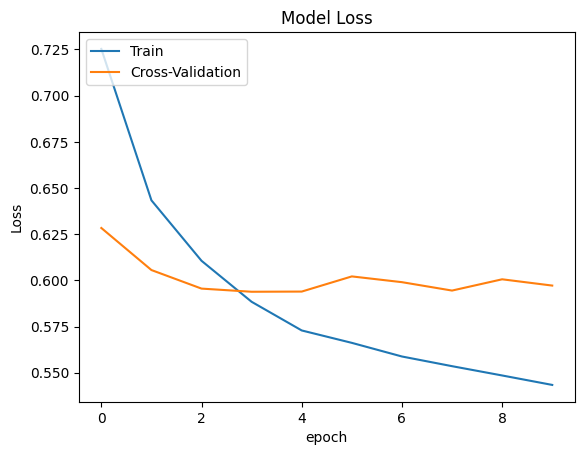

In [159]:
#plot history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()
# Decreasing loss (decreasing blue line) means the model is learning. If the blue doesnt go all the way to the bottom
# which means it is still learning so if we increase the number of epochs maybe it will keep learning more
# If the cross-validation starts going up it means we're overfitting so decrease epochs, change batch_size etc.

## View the accuracy with a Confusion Matrix 

8/8 [==============================] - 0s 1ms/step


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

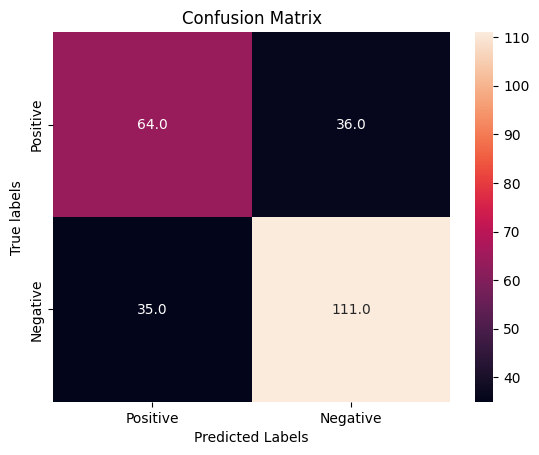

In [160]:
# Create a confusion matrix to see our results
ax1 = plt.subplot()
predict_results = model.predict(X_test)
predict_results = (predict_results >= 0.5) # 0.5 is the threshold. Anything above 0.5 is 1, anything below is 0
cm = confusion_matrix(y_test, predict_results)

sns.heatmap(cm, annot=True, ax=ax1, fmt=".1f")

ax1.set_xlabel('Predicted Labels');ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix')
ax1.xaxis.set_ticklabels(['Positive', 'Negative']); ax1.yaxis.set_ticklabels(['Positive', 'Negative'])